<a href="https://colab.research.google.com/github/markneve/ETS2_projects-1/blob/master/Test_Image_Trainer_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

/bin/bash: line 1: google-drive-ocamlfuse: command not found
[PosixPath('/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Images/Coffee/Coffee1.jpg')]


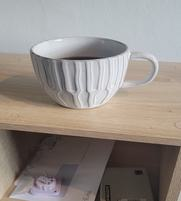

In [44]:
import glob
import pathlib
import PIL

# Define the directory containing your images
image_dir = '/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Images/Coffee/'
#image_dir = 'G:\My Drive\Colab Notebooks\Coffee-MiniRig Project\Images\Coffee'


# Use glob to find all JPG images in the directory
#for name in glob.glob(image_dir + '*.jpg'):
#    print(name)

# Create a pathlib.Path object for the image directory
data_dir = pathlib.Path(image_dir)
!google-drive-ocamlfuse /content/drive

# Use glob with a relative path to find the specific image
image = list(data_dir.glob('Coffee1.jpg'))
print(image)

# Open and display the image
PIL.Image.open(image_dir + 'Coffee1.jpg')

In [45]:
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Images/')
batch_size = 128
#image_height = 4032
#image_width = 1816
#Half the size as the model.fit is crasing due to the size
image_height = 201
image_width = 181
print("done")

done


In [46]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

Found 194 files belonging to 2 classes.
Using 156 files for training.


In [47]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)
print("done")

Found 194 files belonging to 2 classes.
Using 19 files for validation.
done


In [48]:
class_names = train_ds.class_names
print(class_names)

['Coffee', 'MiniRig']


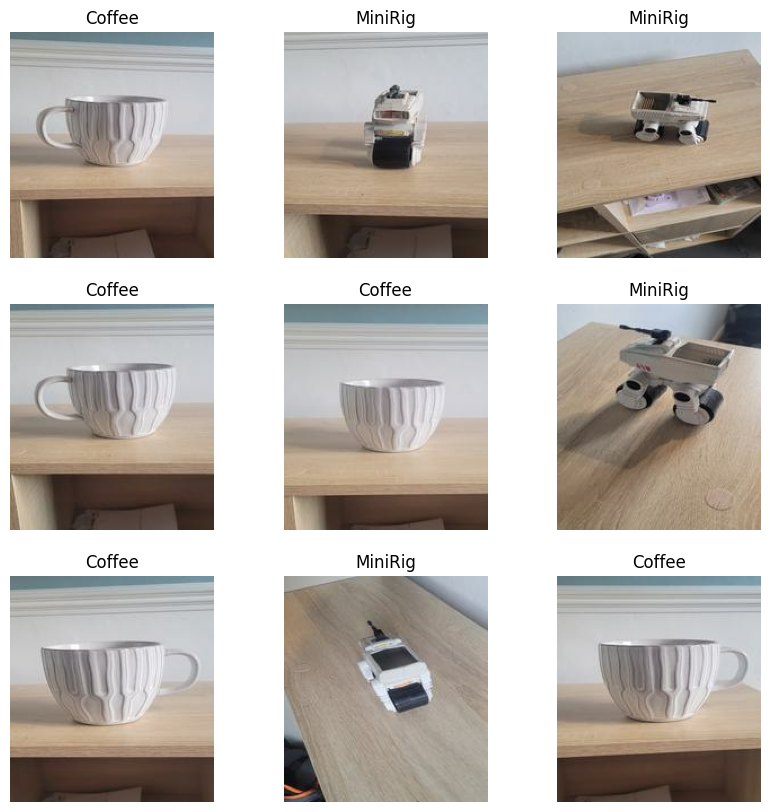

In [49]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [50]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 201, 181, 3)
(128,)


In [51]:
print("started")
num_classes = 2
model = Sequential([
    layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    #layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes),
   #layers.Dense(10, activation='softmax')  #added
])
print("done")

started
done


In [52]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 194 files belonging to 2 classes.
Using 19 files for validation.


In [53]:
print("started")
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
print("done")

started
done


In [54]:
print("started")
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)
print("done")

started
Epoch 1/20
2/2 [==============================] - 2s 197ms/step - loss: 1.0268 - accuracy: 0.4487 - val_loss: 0.9796 - val_accuracy: 0.3684
Epoch 2/20
2/2 [==============================] - 0s 74ms/step - loss: 0.8237 - accuracy: 0.5000 - val_loss: 0.9482 - val_accuracy: 0.3684
Epoch 3/20
2/2 [==============================] - 0s 88ms/step - loss: 0.7876 - accuracy: 0.5000 - val_loss: 0.6998 - val_accuracy: 0.3684
Epoch 4/20
2/2 [==============================] - 0s 69ms/step - loss: 0.6811 - accuracy: 0.5000 - val_loss: 0.6336 - val_accuracy: 0.6316
Epoch 5/20
2/2 [==============================] - 0s 70ms/step - loss: 0.6774 - accuracy: 0.5000 - val_loss: 0.6164 - val_accuracy: 0.7895
Epoch 6/20
2/2 [==============================] - 0s 69ms/step - loss: 0.6115 - accuracy: 0.8526 - val_loss: 0.5391 - val_accuracy: 0.6316
Epoch 7/20
2/2 [==============================] - 0s 65ms/step - loss: 0.5981 - accuracy: 0.5833 - val_loss: 0.5450 - val_accuracy: 0.8421
Epoch 8/20
2/2 [==

In [55]:
epochs=20
history=model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/20
2/2 [==============================] - 0s 80ms/step - loss: 0.0162 - accuracy: 0.9936 - val_loss: 0.1764 - val_accuracy: 0.9474
Epoch 2/20
2/2 [==============================] - 0s 76ms/step - loss: 0.0370 - accuracy: 0.9936 - val_loss: 0.1352 - val_accuracy: 0.9474
Epoch 3/20
2/2 [==============================] - 0s 74ms/step - loss: 0.0323 - accuracy: 0.9936 - val_loss: 0.0831 - val_accuracy: 0.9474
Epoch 4/20
2/2 [==============================] - 0s 72ms/step - loss: 0.0252 - accuracy: 0.9936 - val_loss: 0.0833 - val_accuracy: 0.9474
Epoch 5/20
2/2 [==============================] - 0s 69ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 0.9474
Epoch 6/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9474
Epoch 7/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 0.9474
Epoch 8/20
2/2 [===========

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 201, 181, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 201, 181, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 100, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 90, 32)       4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 45, 64)       

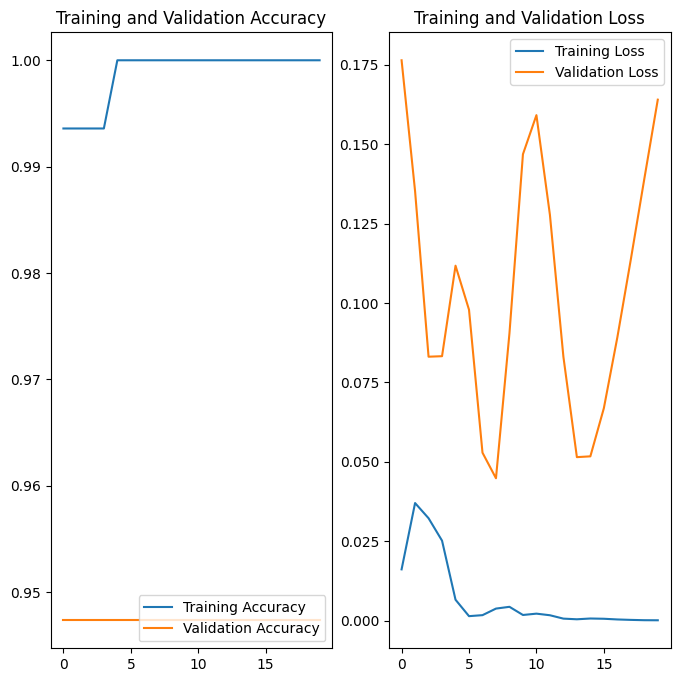

In [57]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

[]


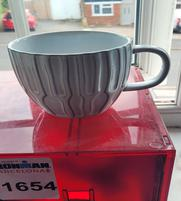

In [58]:
import glob
for name in glob.glob('/content/drive/MyDrive/Colab Notebooks/Test Data/*.jpg'):
    print(name)
roses = list(data_dir.glob('Test/MiniRig/Mini1.jpg'))
print(roses)
PIL.Image.open('/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data/Coffee_Test1.jpg')

Starting
Processing image 1: /content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data/Coffee_Test1.jpg
1/1 [==============================] - 0s 71ms/step
Score: [1.0000000e+00 1.0077757e-19]
Argmax index: 0
Class names length: 2
Processing image 2: /content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data/Coffee_Test2.jpg
1/1 [==============================] - 0s 18ms/step
Score: [0.96763    0.03237002]
Argmax index: 0
Class names length: 2
Processing image 3: /content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data/Coffee_Test3.jpg
1/1 [==============================] - 0s 17ms/step
Score: [1.0000000e+00 3.7877315e-09]
Argmax index: 0
Class names length: 2
Processing image 4: /content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data/Coffee_Test4.jpg
1/1 [==============================] - 0s 21ms/step
Score: [1.0000000e+00 2.1808912e-19]
Argmax index: 0
Class names length: 2
Processing image 5: /content/drive/MyDrive/Colab Note

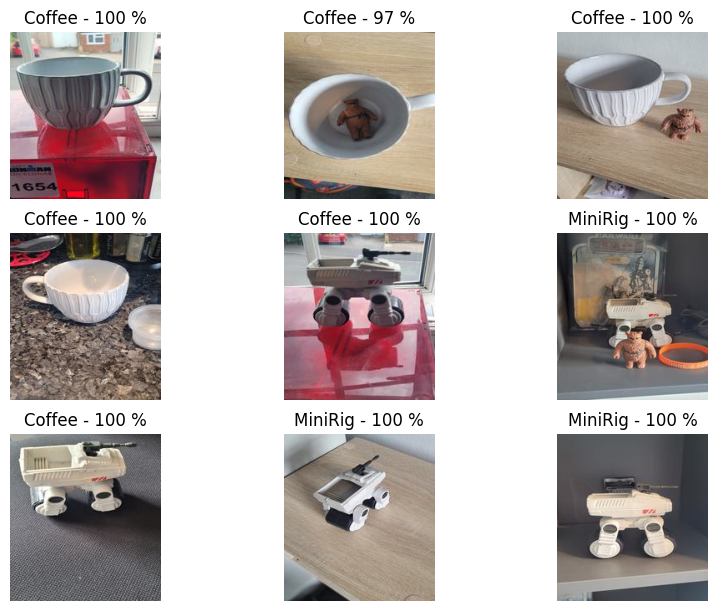

In [59]:
# Directory containing images
test_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data')

# Get list of image paths
pics_paths = list(test_dir.glob('*.jpg'))

# Define class names
class_names = ['Coffee','MiniRig']

# Create a figure for plotting
plt.figure(figsize=(10, 10))
print("Starting")

for i, pics_path in enumerate(pics_paths):
    print(f"Processing image {i + 1}: {pics_path}")

    # Load and preprocess image
    my_img = keras.preprocessing.image.load_img(pics_path, target_size=(image_height, image_width))
    img_arr = keras.preprocessing.image.img_to_array(my_img)
    img_arr = tf.expand_dims(img_arr, 0)  # Create batch axis

    # Predict
    predictions = model.predict(img_arr)
    score = tf.nn.softmax(predictions[0])

    # Debug prints
    print("Score:", score.numpy())  # Convert tensor to numpy array
    print("Argmax index:", np.argmax(score))
    print("Class names length:", len(class_names))

    # Ensure index is within range
    if np.argmax(score) < len(class_names):
      try:
          percent = int(round(100 * np.nanmax(score), 0))
          title = "{} - {} %".format(class_names[np.argmax(score)], percent)
      except (ValueError, IndexError):
          title = "Error processing image"
    else:
        title = "Unknown class - {} %".format(int(round(100 * np.max(score), 0)))

    # Plot image and prediction
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(my_img)
    plt.title(title)
    plt.axis("off")

print("Complete")
plt.show()



In [60]:
print("Number of class names:", len(class_names))
num_classes = model.output_shape[-1]  # Should match the length of class_names
print("Number of classes in model output:", num_classes)
print("Predictions shape:", predictions.shape)
print("Score:", score.numpy())  # Convert tensor to numpy array for printing



Number of class names: 2
Number of classes in model output: 2
Predictions shape: (1, 2)
Score: [1.181571e-12 1.000000e+00]


In [61]:
model.save('First_Model.keras')

In [62]:
import shutil

# Define the local path and the Google Drive path
local_model_path = 'First_Model.keras'
drive_model_path = '/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/First_Model.keras'

# Copy the file
shutil.copy(local_model_path, drive_model_path)

'/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/First_Model.keras'

In [63]:
# Load your model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/First_Model.keras')

# Save the model in the SavedModel format

export_path = '/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project'
model.save(export_path, save_format='tf')
print("done")

done


In [71]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from PIL import Image
import os

def load_and_preprocess_image(image_path):
  """Loads and preprocesses an image for model input.

  Args:
    image_path: Path to the image file.
    target_size: Tuple of target image size.

  Returns:
    Preprocessed image as a NumPy array.
  """

  img = Image.open(image_path)
  #if img.mode != 'RGB':
      #img = img.convert('RGB')
  img = img.resize((181, 201))
  img_array = np.array(img) / 255.0  # Normalize pixel values
  #img_array = np.array(img, dtype=np.float32) / 255.0

  return img_array

def run_model(model_path, image_path):
    """Loads the model and runs inference on the given image.

    Args:
      model_path: Path to the saved model.
      image_path: Path to the image file.
class_names: List of class names.
    """
    print("This file:" +model_path+"\First_Model.keras")

    new_model = tf.keras.models.load_model(model_path ,custom_objects={'KerasLayer':hub.KerasLayer})
    new_model.summary()

    model.build((None, 201, 181, 3))


    #model = tf.saved_model.load(model_path)
    preprocessed_image = load_and_preprocess_image(image_path)
    # Add batch dimension
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

    # Assuming the model expects a batch of images as input
    predictions = model(preprocessed_image, training=False)
    score = tf.nn.softmax(predictions[0])

    # Get the index of the highest probability
    predicted_class_index = np.argmax(score)
    # Get the index of the highest probability
    predicted_class = np.argmax(score)


    # Get the predicted class name
    predicted_class = class_names[predicted_class_index]
    print("Predicted class:", predicted_class)
    print("Prediction scores:", score)
    print("Score:", score.numpy())  # Convert tensor to numpy array
    print("Argmax index:", np.argmax(score))
    print("*******************")
    Image.open(image_path)

class_names = ['Coffee','MiniRig']
model_path = '/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project'
image_path = "/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data/"
print(image_path + "Rig_Test5.jpg")
#run_model(model_path, image_path + "Rig_Test4.jpg")
for file in os.listdir(image_path):
  if file.endswith(".jpg"):
    print("\n*******************")
    print(image_path + file)
    run_model(model_path, image_path + file)





/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data/Rig_Test5.jpg

*******************
/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project/Test Data/Coffee_Test1.jpg
This file:/content/drive/MyDrive/Colab Notebooks/Coffee-MiniRig Project\First_Model.keras
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 201, 181, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 201, 181, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 100, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 90, 32)       4640      
                                